<a href="https://colab.research.google.com/github/saurav-cell/credit-card-fraud-detection/blob/main/CreditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

This project aims to detect fraudulent credit card transactions using machine learning models.  
The dataset is highly imbalanced, which makes fraud detection a challenging and realistic classification problem.

The notebook covers:
- Exploratory Data Analysis (EDA)
- Data preprocessing
- Model training
- Model evaluation using appropriate metrics


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Dataset Overview

This section provides an overview of the dataset structure, including the number of samples, features, and presence of missing values.


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


## Display Descriptive Statistics

###  Descriptive Statistics

We begin by examining basic statistical properties of the dataset to understand feature distributions, ranges, and potential anomalies.



In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


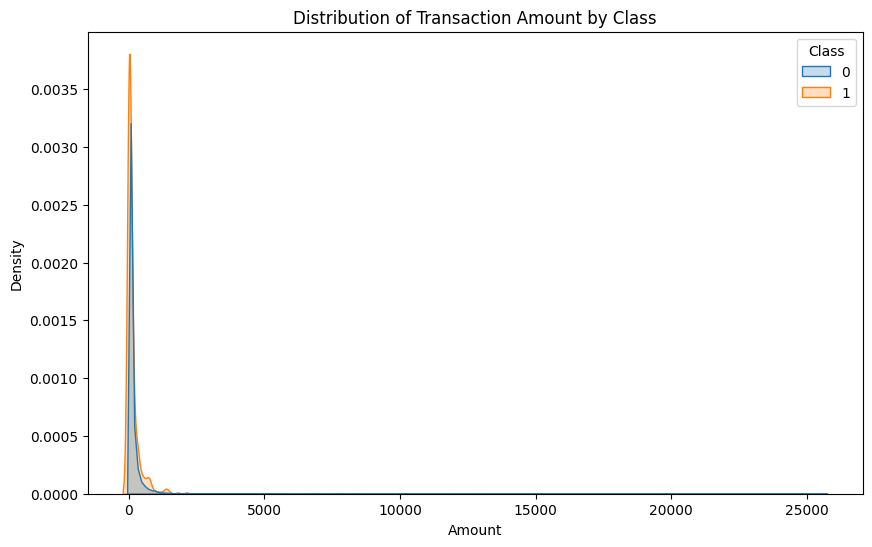

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Amount', hue='Class', fill=True, common_norm=False)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.show()

## Transaction Amount Analysis

This visualization compares transaction amount distributions for fraudulent and non-fraudulent transactions.  
It helps identify whether fraud tends to occur at specific transaction ranges.


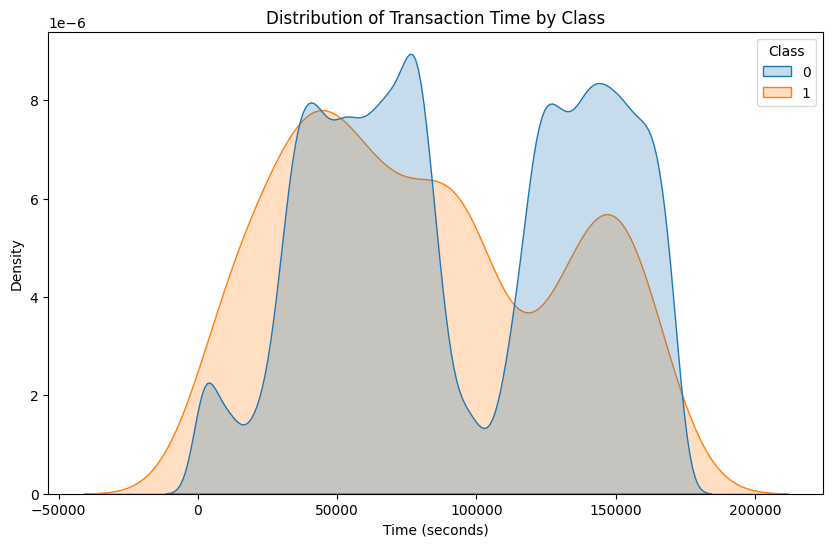

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Time', hue='Class', fill=True, common_norm=False)
plt.title('Distribution of Transaction Time by Class')
plt.xlabel('Time (seconds)')
plt.ylabel('Density')
plt.show()

## Summary:

### Q&A
The key insights gained from the exploratory data analysis are:
*   There is a severe class imbalance in the dataset, with fraudulent transactions making up only 0.173% of the total.
*   Fraudulent transactions tend to involve smaller amounts compared to normal transactions.
*   While both transaction classes generally follow similar temporal patterns, there might be subtle differences in their distribution over time that could be further investigated.

### Data Analysis Key Findings
*   The dataset exhibits a significant class imbalance: 284,315 (99.827%) transactions are legitimate (Class 0), while only 492 (0.173%) are fraudulent (Class 1).
*   The average transaction amount is \$88.35, with a high standard deviation of \$250.12, and amounts range from \$0.00 to \$25691.16.
*   The distribution of transaction amounts differs between classes, with fraudulent transactions tending to be concentrated at lower values compared to normal transactions.
*   Transaction times span approximately 94814 seconds on average, with a standard deviation of 47488 seconds, and both normal and fraudulent transactions generally follow similar time distributions.




In [ ]:
# Drop the 'Time' column as it's not needed for modeling
df = df.drop(['Time'], axis=1)

# Scale the 'Amount' column
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

In [ ]:
# Define features (X) and target (y)
X = df.drop(['Class'], axis=1)
y = df['Class']

## Baseline Model : Logistic Regression Model




## Logistic Regression

Logistic Regression is used as a baseline model due to its simplicity and interpretability.  
Despite its limitations, it provides a strong reference point for comparing more complex models.


## Train-Test Split

The dataset is split into training and testing sets to evaluate model performance on unseen data.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
log_reg = LogisticRegression(solver='liblinear', class_weight='balanced',random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42,
                   solver='liblinear')

In [ ]:
y_pred_log_reg = log_reg.predict(X_test)
y_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]

## Model Evaluation

Due to severe class imbalance, accuracy alone is not a reliable metric.  
Precision, recall, F1-score, and ROC-AUC are used to better assess fraud detection performance.


## Performance Analysis

The confusion matrix and classification report provide insight into false positives and false negatives, which are critical in fraud detection scenarios.


Logistic Regression Classifier Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


Confusion Matrix:


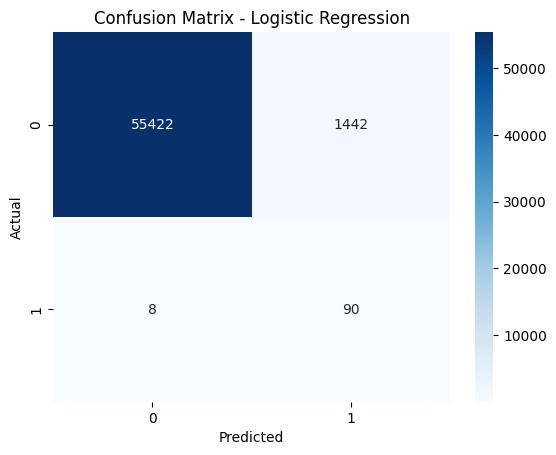


ROC AUC Score: 0.9714


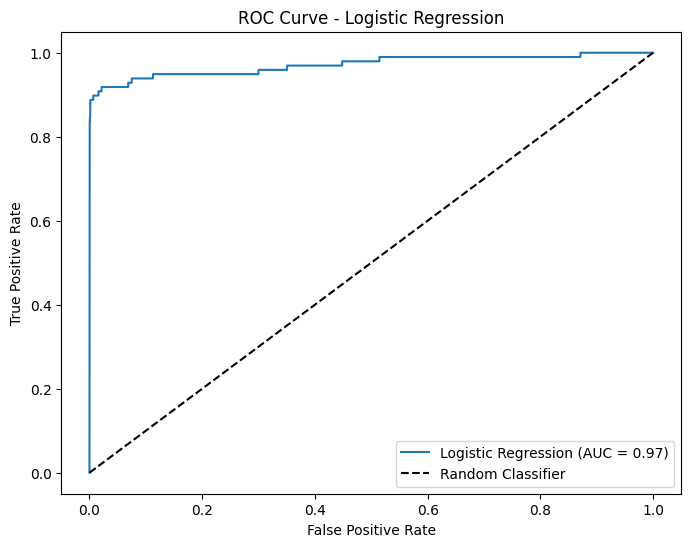

In [ ]:
print('Logistic Regression Classifier Metrics:')
print('Classification Report:')
print(classification_report(y_test, y_pred_log_reg))

print('\nConfusion Matrix:')
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)
print(f'\nROC AUC Score: {roc_auc_log_reg:.4f}')

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_proba_log_reg)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

## Decision Tree Model



## Decision Tree Classifier

A Decision Tree classifier is trained to capture non-linear decision boundaries in the data.  
Unlike linear models, decision trees can model complex feature interactions, making them suitable for fraud detection tasks.


## Model Training

The Decision Tree model is trained on the training dataset using default hyperparameters as a baseline.


In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=6,
    class_weight='balanced',random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [ ]:
y_pred_dt = dt_classifier.predict(X_test)
y_proba_dt = dt_classifier.predict_proba(X_test)[:, 1]

## Decision Tree Performance Evaluation

The model is evaluated using precision, recall, F1-score, and ROC-AUC to assess its ability to correctly identify fraudulent transactions.


Decision Tree Classifier Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.87      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962


Confusion Matrix:


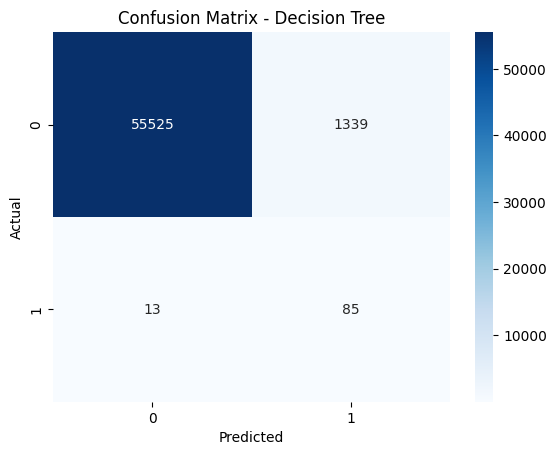


ROC AUC Score: 0.9121


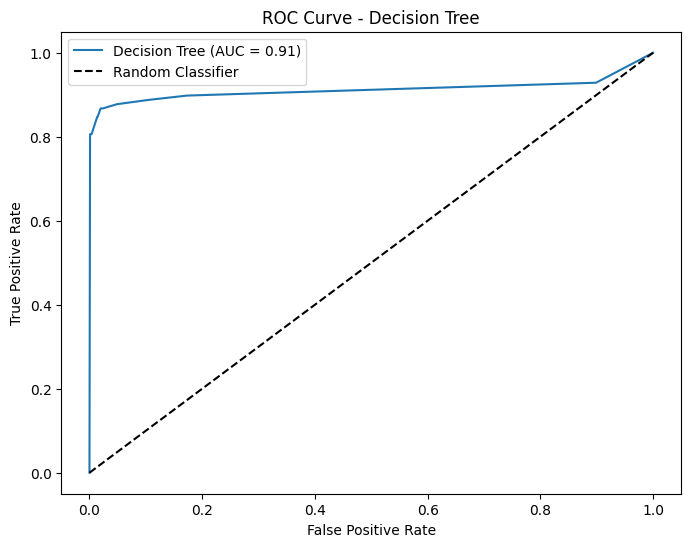

In [ ]:
print('Decision Tree Classifier Metrics:')
print('Classification Report:')
print(classification_report(y_test, y_pred_dt))

print('\nConfusion Matrix:')
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_dt = roc_auc_score(y_test, y_proba_dt)
print(f'\nROC AUC Score: {roc_auc_dt:.4f}')

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()

## Gradient Boosting Classifier

To address the limitations of a single decision tree, a Gradient Boosting classifier is applied.  
This ensemble method combines multiple weak learners to improve generalization and robustness.


## Model Training

The Gradient Boosting model is trained on the same training data to allow a fair comparison with previous models.


Gradient Boosting Classifier Metrics:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.17      0.90      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.95      0.64     56962
weighted avg       1.00      0.99      1.00     56962


Confusion Matrix:


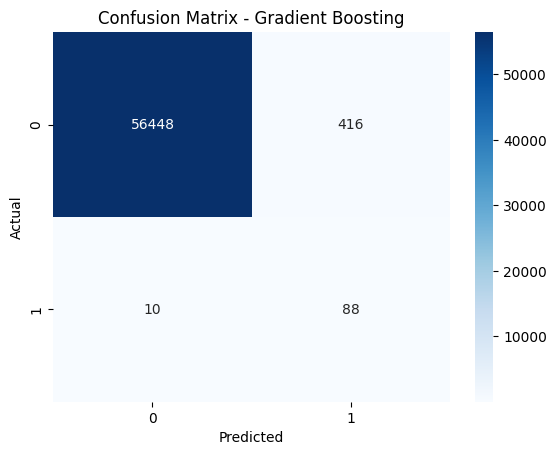


ROC AUC Score: 0.9773


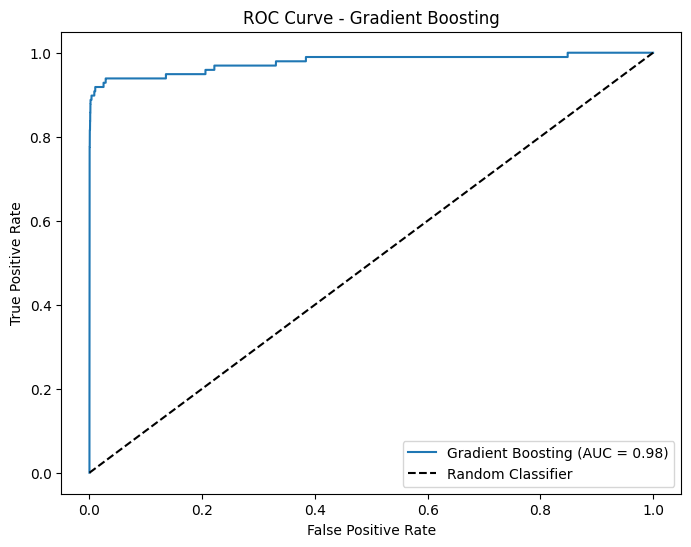

In [ ]:
# Calculate class weights to handle imbalance (penalize fraud class more heavily)
class_counts = y_train.value_counts()
weight_class_0 = 1
weight_class_1 = class_counts[0] / class_counts[1]

# Create sample weights array
sample_weights = np.array([weight_class_0 if label == 0 else weight_class_1 for label in y_train])

# Initialize GradientBoostingClassifier with specified hyperparameters
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model with sample weights
gb_classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)
y_proba_gb = gb_classifier.predict_proba(X_test)[:, 1]

print('Gradient Boosting Classifier Metrics:')
print('Classification Report:')
print(classification_report(y_test, y_pred_gb))

print('\nConfusion Matrix:')
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

roc_auc_gb = roc_auc_score(y_test, y_proba_gb)
print(f'\nROC AUC Score: {roc_auc_gb:.4f}')

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_proba_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

## Gradient Boosting Performance Evaluation

Evaluation metrics focus on recall and ROC-AUC, as identifying fraudulent transactions correctly is more critical than overall accuracy.


## Model Comparison



The models are compared primarily on Precision, Recall, F1-score (for the fraud class), and ROC-AUC, as the dataset is highly imbalanced and overall accuracy is not a reliable indicator.

**Logistic Regression** achieves very high recall (0.9184), indicating that it successfully identifies most fraudulent transactions. However, its extremely low precision (0.0587) suggests a large number of false positives, which could lead to unnecessary transaction blocking in real-world systems. Despite this, its high ROC-AUC (0.9714) shows strong overall ranking capability.

**Decision Tree** shows slightly improved precision (0.0597) compared to Logistic Regression but at the cost of lower recall (0.8673). The reduced ROC-AUC score (0.9121) indicates weaker generalization performance, likely due to overfitting, which is a common limitation of single-tree models.

**Gradient Boosting** provides the best overall balance among the three models. It significantly improves precision (0.1746) while maintaining high recall (0.8980), resulting in a substantially higher F1-score (0.2924). The model also achieves the highest ROC-AUC score (0.9773), indicating superior discrimination between fraudulent and non-fraudulent transactions.

Overall, while Logistic Regression serves as a strong baseline for maximizing recall, Gradient Boosting emerges as the most effective model by balancing fraud detection capability with a reduced false positive rate.


In [ ]:
model_names = ['Logistic Regression', 'Decision Tree', 'Gradient Boosting']

# Metrics for Logistic Regression
cr_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)
log_reg_metrics = {
    'Precision (Class 1)': cr_log_reg['1']['precision'],
    'Recall (Class 1)': cr_log_reg['1']['recall'],
    'F1-Score (Class 1)': cr_log_reg['1']['f1-score'],
    'ROC AUC Score': roc_auc_log_reg
}

# Metrics for Decision Tree
cr_dt = classification_report(y_test, y_pred_dt, output_dict=True)
dt_metrics = {
    'Precision (Class 1)': cr_dt['1']['precision'],
    'Recall (Class 1)': cr_dt['1']['recall'],
    'F1-Score (Class 1)': cr_dt['1']['f1-score'],
    'ROC AUC Score': roc_auc_dt
}

# Metrics for Gradient Boosting
cr_gb = classification_report(y_test, y_pred_gb, output_dict=True)
gb_metrics = {
    'Precision (Class 1)': cr_gb['1']['precision'],
    'Recall (Class 1)': cr_gb['1']['recall'],
    'F1-Score (Class 1)': cr_gb['1']['f1-score'],
    'ROC AUC Score': roc_auc_gb
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Logistic Regression': log_reg_metrics,
    'Decision Tree': dt_metrics,
    'Gradient Boosting': gb_metrics
}).T # Transpose to have models as rows

print('Model Comparison Table:')
display(comparison_df.round(4))

Model Comparison Table:


,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),ROC AUC Score
Logistic Regression,0.0587,0.9184,0.1104,0.9714
Decision Tree,0.0597,0.8673,0.1117,0.9121
Gradient Boosting,0.1746,0.8980,0.2924,0.9773


## Conclusion

This project highlights the challenges of credit card fraud detection on highly imbalanced datasets.  
While simpler models are useful for baselines, ensemble methods significantly improve fraud detection performance.

Selecting appropriate evaluation metrics is crucial, as accuracy alone does not reflect real-world effectiveness.


## Future Work

Several improvements could further enhance fraud detection performance:

- Hyperparameter tuning to optimize model generalization
- Cost-sensitive learning to reduce false positives
- Threshold optimization based on business requirements
- Neural network–based models for capturing deeper non-linear patterns
- Unsupervised anomaly detection for identifying previously unseen fraud patterns
